# Student performance indicator
life cycle of a machine learning project:
1. Understand the problem
2. Data collection
3. Data checks
4. Exploratory data analysis
5. Data preprocessing
6. Model training
7. Choose best model

## 1. problem statement

how performance corresponds to factors like "gender","race_ethnicity","parental_level_of_education","lunch","test_preparation_course"

In [1]:
#importing all required libs
import numpy as np
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [13]:
df = pd.read_csv('Data/stud.csv')
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### data checks
1. missing values
2. duplicates
3. data types
4. no. of unique values of each col
5. stats of data set


In [15]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [17]:
#check for duplicates
dup_count = df.duplicated().sum()
if dup_count > 0:
    df = df.drop_duplicates()   
else:
    print("No duplicates found")

No duplicates found


In [18]:
df.info() # check for NULL and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [19]:
#unique values check
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [20]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [24]:
#exploring the data
print(f"unique values in gender are {df['gender'].unique()}")
print(f"unique values in race are {df['race_ethnicity'].unique()}")
print(f"unique values in parental level of education are {df['parental_level_of_education'].unique()}")
print(f"unique values in lunch are {df['lunch'].unique()}")
print(f"unique values in test preparation course are {df['test_preparation_course'].unique()}")


unique values in gender are ['female' 'male']
unique values in race are ['group B' 'group C' 'group A' 'group D' 'group E']
unique values in parental level of education are ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
unique values in lunch are ['standard' 'free/reduced']
unique values in test preparation course are ['none' 'completed']


In [25]:
numerical_cols= [col for col in df.columns if df[col].dtype !='O']
categorical_cols= [col for col in df.columns if df[col].dtype =='O']

In [29]:
print(f"Numerical columns: {numerical_cols} {len(numerical_cols)}")
print(f"Categorical columns: {categorical_cols} {len(categorical_cols)}")

Numerical columns: ['math_score', 'reading_score', 'writing_score'] 3
Categorical columns: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'] 5


In [41]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df.head()
df['average_score'] = df['total_score']/3
df.head()

#full scores 
readingfull= df[df['reading_score']==100]['average_score'].count()
writingfull= df[df['writing_score']==100]['average_score'].count()
mathfull= df[df['math_score']==100]['average_score'].count()
print(f"Number of students with full reading score: {readingfull}")
print(f"Number of students with full writing score: {writingfull}") 
print(f"Number of students with full math score: {mathfull}")

print(f"no of students with less than 20 marks in reading writing and learning are {df[df['reading_score']<20]['average_score'].count()}, {df[df['writing_score']<20]['average_score'].count()}, {df[df['math_score']<20]['average_score'].count()} respectively")

Number of students with full reading score: 17
Number of students with full writing score: 14
Number of students with full math score: 7
no of students with less than 20 marks in reading writing and learning are 1, 3, 4 respectively


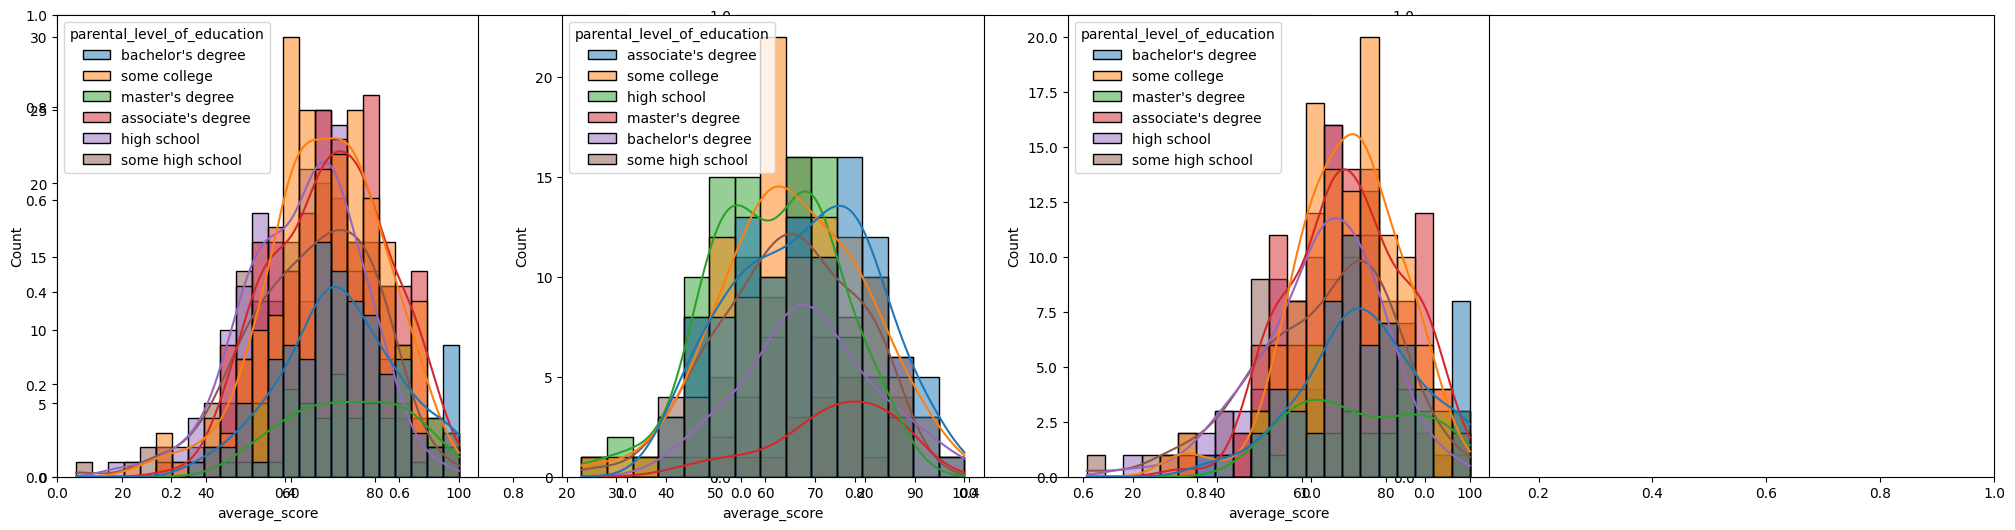

In [44]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

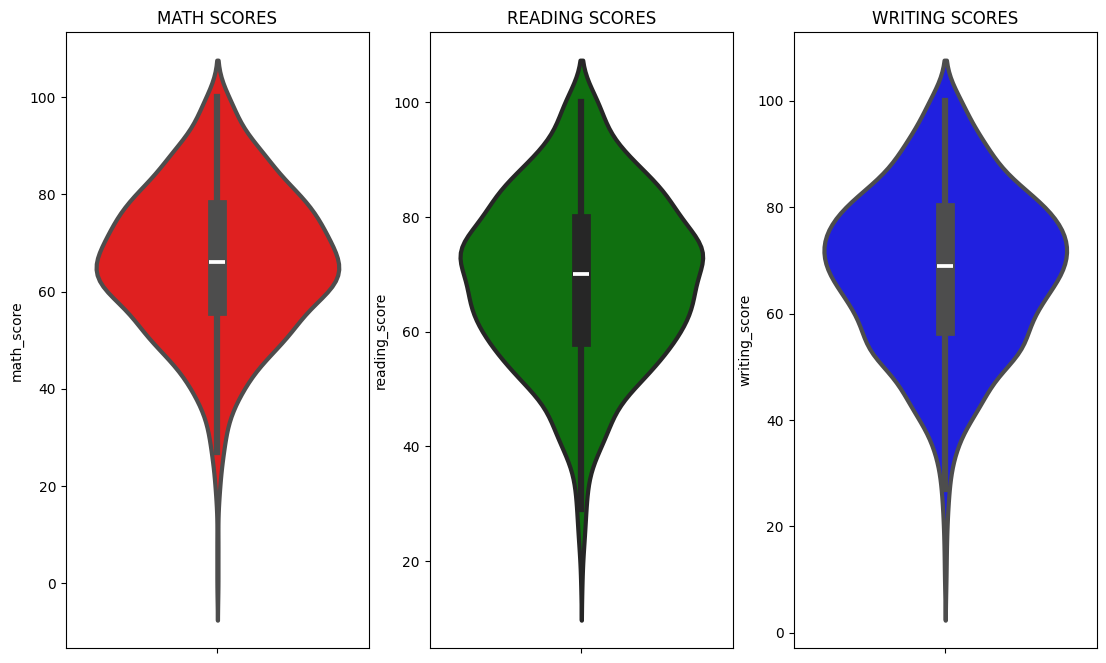

In [46]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()